<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/ISE_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidoryEJ3regression.csv to Dane pomidoryEJ3regression.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Dane pomidoryEJ3regression.csv']),delimiter=';')

In [6]:
df

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,M
0,Daktyle,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.002363,0.040896,0.050755,0.002831,0.052790
1,Daktyle,1,1,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.001785,0.042695,0.052439,0.000054,0.052790
2,Daktyle,1,1,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,-0.002705,0.039837,0.052399,-0.002033,0.052790
3,barszcz diluted 45mlH2O5ml,2,2,1,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,0.018991,-0.025790,-0.017516,0.017514,0.051154
4,barszcz diluted 45mlH2O5ml,2,2,2,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,0.018885,-0.025828,-0.018449,0.015818,0.051154
5,barszcz diluted 45mlH2O5ml,2,2,3,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,0.023850,-0.026117,-0.018555,0.015969,0.051154
6,Tarczyn pikantny,3,3,1,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.013696,0.036756,0.041368,0.013792,0.063942
7,Tarczyn pikantny,3,3,2,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.015298,0.036688,0.042073,0.014737,0.063942
8,Tarczyn pikantny,3,3,3,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.014268,0.037570,0.042224,0.013817,0.063942
9,tymbark klasyczny E190127,4,3,1,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.014777,0.036836,0.042851,0.013724,0.063942


In [7]:
#lets check the correlation matrix of our dataframe
corr = df.corr()
plt.figure(figsize=(6,6))
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<ipython-input-7-3cf94f135b3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-7-3cf94f135b3d>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Kod,Rodzaj próbki,Powtórzenie,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,M
Kod,1.00,0.64,0.00,-0.39,-0.37,-0.30,-0.29,-0.30,-0.35,-0.34,-0.39,0.46,0.47,-0.38,-0.40
Rodzaj próbki,0.64,1.00,0.00,-0.67,-0.64,-0.60,-0.60,-0.62,-0.68,-0.66,-0.73,0.73,0.74,-0.72,-0.80
Powtórzenie,0.00,0.00,1.00,-0.04,-0.02,-0.02,0.01,-0.00,0.01,-0.04,-0.01,0.00,-0.00,-0.00,-0.00
DB 5,-0.39,-0.67,-0.04,1.00,1.00,0.98,0.97,0.97,0.98,0.98,0.97,-0.89,-0.86,0.97,0.88
DB 4,-0.37,-0.64,-0.02,1.00,1.00,0.98,0.98,0.98,0.98,0.98,0.96,-0.88,-0.86,0.96,0.87
V5,-0.30,-0.60,-0.02,0.98,0.98,1.00,0.99,0.99,0.97,0.97,0.94,-0.81,-0.78,0.94,0.87
V5_2?,-0.29,-0.60,0.01,0.97,0.98,0.99,1.00,0.99,0.97,0.96,0.94,-0.80,-0.77,0.95,0.87
V1,-0.30,-0.62,-0.00,0.97,0.98,0.99,0.99,1.00,0.97,0.96,0.95,-0.82,-0.79,0.95,0.88
K+ 3,-0.35,-0.68,0.01,0.98,0.98,0.97,0.97,0.97,1.00,0.99,0.97,-0.90,-0.88,0.98,0.90
K+ 5,-0.34,-0.66,-0.04,0.98,0.98,0.97,0.96,0.96,0.99,1.00,0.97,-0.90,-0.89,0.97,0.88


<Figure size 600x600 with 0 Axes>

### Split the dataset into the features, that will be used for the analysis X and the vector of values that we will want to predict y

In [8]:
#lets choose the all the columns except the concentration
X = df.iloc[:,5:16].values

In [9]:
#lets print first four rows to see if we got it right
print(X[:4,:])

[[ 5.9853690e-02  5.7587834e-02  6.5035437e-02  5.7519144e-02
   5.1446000e-02  7.8237257e-02  7.2612486e-02  2.3629280e-03
   4.0895800e-02  5.0754762e-02  2.8313360e-03]
 [ 5.7857197e-02  5.6253596e-02  6.5363757e-02  5.7579348e-02
   5.2227000e-02  7.8045537e-02  7.0765311e-02  1.7854010e-03
   4.2695045e-02  5.2438921e-02  5.4236400e-05]
 [ 5.8484730e-02  5.5428550e-02  6.4738276e-02  5.7005144e-02
   5.2501671e-02  7.6054573e-02  7.1157886e-02 -2.7051740e-03
   3.9837253e-02  5.2398559e-02 -2.0325880e-03]
 [ 3.8311901e-02  3.9211577e-02  1.9193105e-02  1.1543428e-02
   6.9141400e-03  5.9756987e-02  6.1616775e-02  1.8990794e-02
  -2.5790430e-02 -1.7516321e-02  1.7513798e-02]]


In [10]:
# Normalization : scaling individual samples to have unit norm
from sklearn.preprocessing import StandardScaler, normalize;

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X)

# Converting the numpy array into a pandas DataFrame
normX = pd.DataFrame(X_normalized)
normX


,0,1,2,3,4,5,6,7,8,9,10
0,0.330793,0.318270,0.359431,0.317890,0.284326,0.432393,0.401307,0.013059,0.226018,0.280506,0.015648
1,0.320924,0.312029,0.362561,0.319382,0.289694,0.432905,0.392523,0.009903,0.236822,0.290869,0.000301
2,0.327546,0.310430,0.362569,0.319259,0.294037,0.425946,0.398522,-0.015150,0.223110,0.293460,-0.011384
3,0.341830,0.349857,0.171247,0.102994,0.061690,0.533169,0.549763,0.169441,-0.230110,-0.156286,0.156263
4,0.345541,0.336224,0.184148,0.113468,0.079276,0.546192,0.525391,0.175947,-0.240634,-0.171881,0.147371
5,0.315912,0.310446,0.177910,0.107775,0.078577,0.563022,0.538523,0.212860,-0.233097,-0.165600,0.142526
6,0.268563,0.303358,0.350025,0.307532,0.284277,0.446096,0.430500,0.091520,0.245613,0.276429,0.092160
7,0.261123,0.289491,0.353582,0.312071,0.264018,0.447910,0.443748,0.101929,0.244440,0.280319,0.098186
8,0.250391,0.282510,0.355945,0.319998,0.269097,0.445060,0.442467,0.095898,0.252517,0.283801,0.092867
9,0.348003,0.292910,0.346556,0.305582,0.276540,0.425997,0.410740,0.096325,0.240115,0.279330,0.089458


In [11]:
# we will try to predict the concentration content so lets column concentration to y
y = df.iloc[:,16].values

In [12]:
# and check if its the concentration
print(y)

[0.05279042 0.05279042 0.05279042 0.05115351 0.05115351 0.05115351
 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189
 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189
 0.06138421 0.06138421 0.06138421 0.07673027 0.07673027 0.07673027
 0.03836513 0.03836513 0.03836513 0.00019183 0.00019183 0.00019183
 0.00115863 0.00115863 0.00115863 0.00017904 0.00017904 0.00017904
 0.01278838 0.01278838 0.01278838 0.02532099 0.02532099 0.02532099
 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189]


## Splitting the dataset into the Training set and Test set

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normX, y, test_size = 0.35, random_state=1)

In [132]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
24,0.210515,0.245498,0.393020,0.275123,0.234213,0.402698,0.396023,-0.092732,0.360262,0.376452,-0.106292
22,0.286404,0.294704,0.374365,0.305284,0.284665,0.474974,0.364727,0.145890,0.251031,0.245072,0.117280
13,0.269771,0.286993,0.369111,0.324457,0.273793,0.453352,0.411950,0.113613,0.237847,0.270435,0.102640
39,0.167549,0.189517,0.268786,0.223365,0.063293,0.265767,0.282083,-0.151688,0.566892,0.541356,-0.149069
17,0.254597,0.270993,0.352504,0.302982,0.283770,0.470257,0.431730,0.111386,0.236883,0.287209,0.081356
46,0.247306,0.256979,0.344089,0.298298,0.278196,0.480902,0.462780,0.089939,0.233763,0.270259,0.082601
4,0.345541,0.336224,0.184148,0.113468,0.079276,0.546192,0.525391,0.175947,-0.240634,-0.171881,0.147371
29,-0.245078,-0.155613,-0.156770,-0.242455,-0.267738,-0.135599,-0.147206,-0.389573,0.462916,0.427174,-0.414830
14,0.255816,0.276102,0.368323,0.325470,0.271485,0.457701,0.422831,0.105541,0.241141,0.275089,0.098951
10,0.272624,0.284747,0.354887,0.317693,0.265105,0.438551,0.440647,0.099418,0.244917,0.288181,0.089597


In [133]:
X_test

,0,1,2,3,4,5,6,7,8,9,10
33,-0.305090,-0.228492,-0.189388,-0.250459,-0.232757,-0.169156,-0.089483,-0.347750,0.483152,0.419146,-0.367788
23,0.274021,0.277587,0.362240,0.312571,0.287182,0.466791,0.412528,0.114400,0.257768,0.236164,0.114400
38,0.026021,0.138573,0.169141,0.081896,0.058327,0.281232,0.269269,-0.360903,0.453192,0.555860,-0.381041
36,0.061993,0.142380,0.191503,0.068071,0.056493,0.325460,0.337652,-0.339404,0.441227,0.533708,-0.341662
2,0.327546,0.310430,0.362569,0.319259,0.294037,0.425946,0.398522,-0.015150,0.223110,0.293460,-0.011384
3,0.341830,0.349857,0.171247,0.102994,0.061690,0.533169,0.549763,0.169441,-0.230110,-0.156286,0.156263
31,-0.183839,-0.117894,-0.096454,-0.127614,-0.138561,-0.118737,-0.132406,-0.343054,0.569753,0.530693,-0.389804
26,0.213396,0.237372,0.358934,0.296543,0.245825,0.414525,0.397512,-0.097861,0.336285,0.394461,-0.113158
44,0.248408,0.273612,0.357481,0.316537,0.266205,0.471871,0.425597,0.082873,0.248015,0.291463,0.086328
27,-0.204087,-0.161700,-0.177766,-0.253877,-0.264913,-0.120272,-0.116992,-0.374678,0.465427,0.446194,-0.426287


In [134]:
print(y_train)

[0.03836513 0.07673027 0.06394189 0.02532099 0.06394189 0.06394189
 0.05115351 0.00019183 0.06394189 0.06394189 0.06394189 0.00115863
 0.06138421 0.02532099 0.00115863 0.06138421 0.03836513 0.06394189
 0.06394189 0.06394189 0.05279042 0.06394189 0.05279042 0.06394189
 0.05115351 0.06394189 0.06394189 0.06394189 0.06394189 0.06394189
 0.01278838]


In [135]:
print(y_test)

[0.00017904 0.07673027 0.01278838 0.01278838 0.05279042 0.05115351
 0.00115863 0.03836513 0.06394189 0.00019183 0.00019183 0.06394189
 0.07673027 0.00017904 0.06138421 0.02532099 0.00017904]


# Regression

# Partial Least Squares

In [70]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

### Apply the model to different parameters and check the opmimum number of Latent Variables

In [71]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
predictions =pls.predict(X_test)


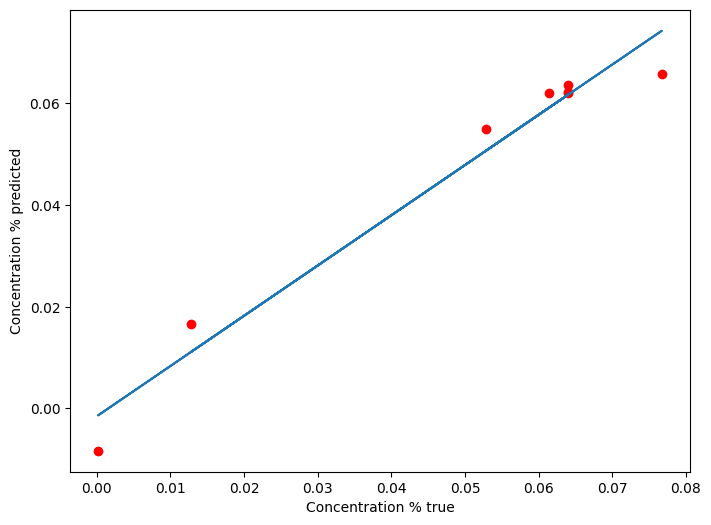

In [72]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions,c='red')
plt.xlabel('Concentration % true')
plt.ylabel('Concentration % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [73]:
y_test

array([0.06394189, 0.01278838, 0.07673027, 0.05279042, 0.06138421,
       0.06394189, 0.00019183, 0.06394189])

In [74]:
predictions

array([[ 0.06203965],
       [ 0.016584  ],
       [ 0.06580449],
       [ 0.05497345],
       [ 0.06198591],
       [ 0.06361759],
       [-0.00831528],
       [ 0.06217875]])

In [75]:
predcopy = pd.DataFrame(predictions)
predcopy

,0
0,0.062040
1,0.016584
2,0.065804
3,0.054973
4,0.061986
5,0.063618
6,-0.008315
7,0.062179


In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

MAE: 0.0037503640765149003
MSE: 2.726377233417908e-05
RMSE: 0.005221472238189061


# Multiple Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [125]:
predictions_lr = regressor.predict(X_test)

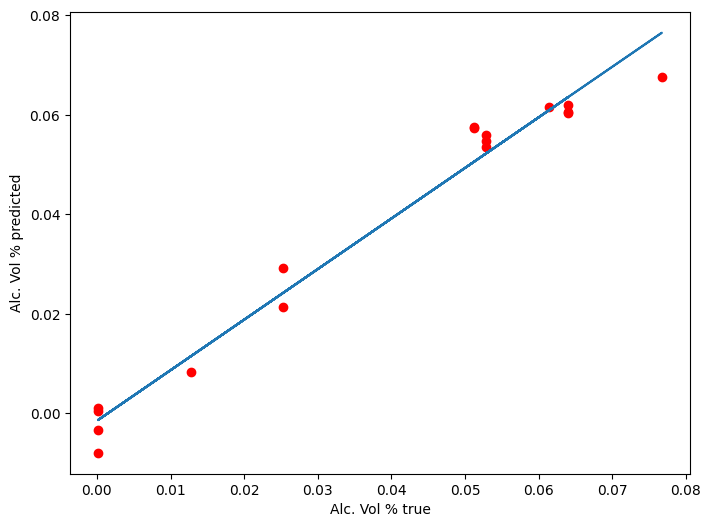

In [126]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [127]:
predcopyMLR = pd.DataFrame(predictions_lr)
predcopyMLR

,0
0,0.057267
1,0.057509
2,0.067547
3,0.054621
4,0.029211
5,0.001008
6,0.060498
7,0.000528
8,0.062008
9,0.053591


In [128]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))

MAE: 0.003645748954278398
MSE: 1.97592067403507e-05
RMSE: 0.0044451329271857215


# Polynomial Regression

In [168]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [169]:
predictions_poly = lin_reg_2.predict(X_poly_test)

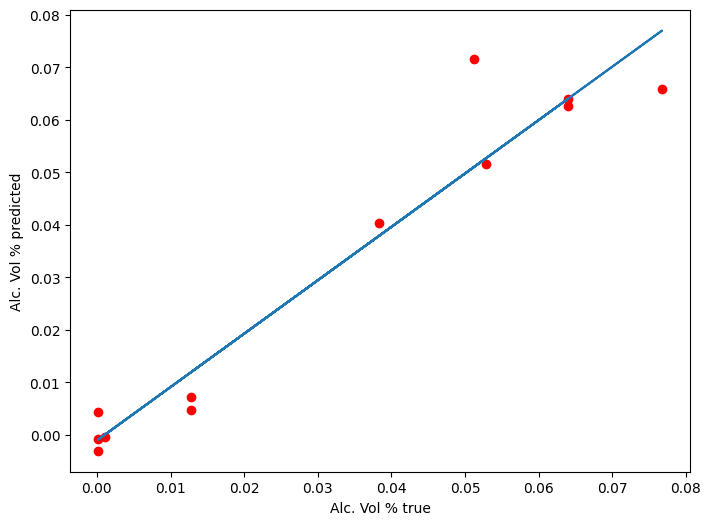

In [170]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_poly,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_poly, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [171]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_poly))
print('MSE:', metrics.mean_squared_error(y_test, predictions_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_poly)))

MAE: 0.004958478745508257
MSE: 5.5857420377577445e-05
RMSE: 0.007473782200303769


# Principal Component Regression

In [136]:
# first perform PCA and choose the number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train)

PCA(n_components=4)

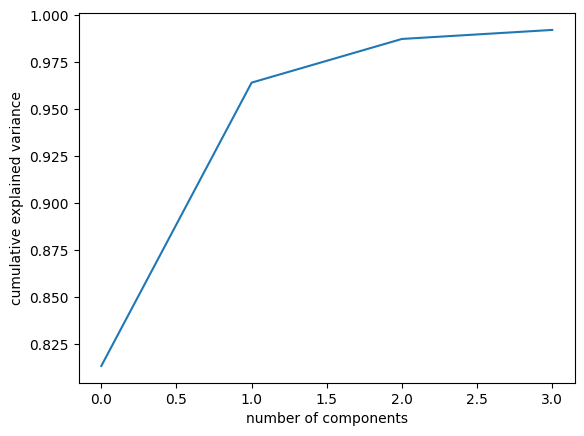

In [137]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [138]:
# perform PCA with the chosen number of components, fit it only on the training data
# and use this model to transform both train and test sets
pca = PCA(n_components=4)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [139]:
# perform linear regression with the results of the PCA
regressor2 = LinearRegression()
regressor2.fit(X_pca_train, y_train)

LinearRegression()

In [140]:
predictions_lr_pca = regressor2.predict(X_pca_test)

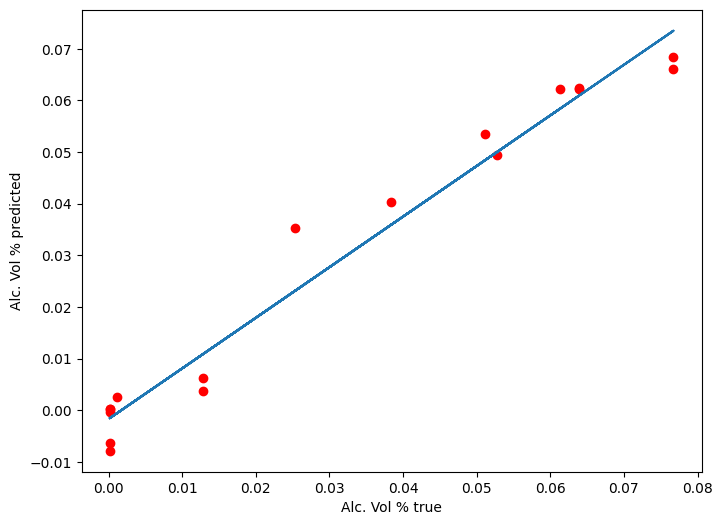

In [141]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr_pca,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr_pca, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [142]:
predcopyPCR = pd.DataFrame(predictions_lr_pca)
predcopyPCR

,0
0,0.000210
1,0.066079
2,0.003762
3,0.006328
4,0.049337
5,0.053589
6,0.002630
7,0.040243
8,0.062298
9,-0.007853


In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr_pca))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr_pca)))

MAE: 0.004280956456962389
MSE: 3.1762698096354376e-05
RMSE: 0.005635840496000076
